# **Thư viện**

In [6]:

from __future__ import print_function
import scipy.signal as sig
import scipy.integrate as sint
from PIL import Image as img
import numpy as np
import os.path
import warnings
import matplotlib.pyplot as plt
import cv2

In [7]:
import time
import sys
from google.colab import output

print('Starting.')

with output.use_tags('some_outputs'):
  sys.stdout.write('working....\n')
  sys.stdout.flush();
  time.sleep(2)

  sys.stdout.write('still working...\n')
  sys.stdout.flush();
  time.sleep(2)

# Now clear the previous outputs.
output.clear(output_tags='some_outputs')
print('All done!')


ModuleNotFoundError: No module named 'google.colab'

**Kết nối với google drive và làm việc với thư mục chứa ảnh mẫu**

In [79]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/PyCNN-master
parent_dir = os.getcwd()
print("Dir: " + parent_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PyCNN-master
Dir: /content/drive/MyDrive/PyCNN-master


# **Module convesre_img**

> Chuyển đổi ảnh về mức tương phản 1 và -1

>  Input
*   gray_image: Ảnh đầu vào

>  Output
*   Ảnh đã được chuyển đổi


In [80]:
def converse_img(grey_img):

    trans  = np.copy(grey_img)
    m = trans.shape[0]
    n = trans.shape[1]
    transformed = np.ones([m,n], dtype='int32')

    for i in range(m):
        for j in range(n):
          new_val = grey_img[i,j]
          if new_val <= 0:
               new_val = -1
          if new_val > 0:
                new_val = 1
          transformed[i, j] = new_val

    return transformed


# **Module getCoord**

>  Input:
*   kernel: ma trận

>  Output:
*   out_filter: bộ lọc



In [81]:

def getCoord(kernel):
    out_filter = np.ones([3,3], dtype='int32')
    center_filter = [1, 1]
    xRows = [0, 0, 1, -1, 1, -1, 1, -1, 0]
    yCols = [-1, 1, 0, 0, -1, -1, 1, 1, 0]
    for k in range(9): # 9 cells
      pixel_in_filter_x = center_filter[0] + xRows[k]
      pixel_in_filter_y = center_filter[1] + yCols[k]
      out_filter[pixel_in_filter_x][pixel_in_filter_y] = kernel[pixel_in_filter_x][pixel_in_filter_y]

    return out_filter


# **Module getkernel**

> Tìm ma trận kernel tại vị trí cell các định bởi (row, col)

>  Input:
*   row, col: hàng, cột
*   gray_img: Ảnh đầu vào

>  Output:
*   out_kernel: Ma trận kernel của cell




In [82]:
def getKernel(row, col, grey_img):
    out_kernel = np.ones([3,3], dtype='int32')
    transformed = np.copy(grey_img)
    m = transformed.shape[0]
    n = transformed.shape[1]

    center_pixel = [row, col]
    center_filter = [1, 1]
    xRows = [-1, -1, -1, 0, 0, 0, 1, 1, 1] # thứ tự theo A, B
    yCols = [-1, 0, 1, -1, 0, 1, -1, 0, 1]


    for k in range(9): # đủ 9 cells
        item = [xRows[k], yCols[k]]
        pixel_in_image_x = center_pixel[0] + item[0]
        pixel_in_image_y = center_pixel[1] + item[1]
        pixel_in_filter_x = center_filter[0] + item[0]
        pixel_in_filter_y = center_filter[1] + item[1]

        if (pixel_in_image_x < 0) or (pixel_in_image_y < 0) or (pixel_in_image_x >= m) or (pixel_in_image_y >= n):
           out_kernel[pixel_in_filter_x][pixel_in_filter_y] = 0
        else:
            out_kernel[pixel_in_filter_x][pixel_in_filter_y] = grey_img[pixel_in_image_x, pixel_in_image_y]

    return out_kernel

# **Module conv3x3**

>Phép tích chập ảnh 3x3 với kernel

>  Input:
*   gray_image: ảnh 3x3
*   kernel: ma trận

>  Output:
*   new_val: giá trị tích chậm




In [83]:
def conv3x3(grey_img, kernel):
    transformed = np.copy(grey_img)

    center_filter = [1, 1]
    xRows = [0, 0, 1, -1, 1, -1, 1, -1, 0]
    yCols = [-1, 1, 0, 0, -1, -1, 1, 1, 0]
    new_val = 0.0

    for k in range(9): # đủ 9 cells

         pixel_in_filter_x = center_filter[0] + xRows[k]
         pixel_in_filter_y = center_filter[1] + yCols[k]
         new_val = new_val + (grey_img[pixel_in_filter_x, pixel_in_filter_y] * kernel[pixel_in_filter_x][pixel_in_filter_y])

    return new_val

# **Module conv**

> Phép tích chập ảnh với kernel

>  Input:
*   gray_image: ảnh
*   kernel: ma trận

>  Output:
*   transformed: Ảnh đã qua phép biến đổi tích chập với kernel



In [84]:
def conv(grey_img, kernel):
    transformed = np.copy(grey_img)
    m = transformed.shape[0]
    n = transformed.shape[1]


    for i in range(1, m - 1):
        for j in range(1, n - 1):
            center_pixel = [i, j]
            center_filter = [1, 1]
            xRows = [0, 0, 1, -1, 1, -1, 1, -1, 0]
            yCols = [-1, 1, 0, 0, -1, -1, 1, 1, 0]
            #print(i, j)
            new_val = 0.0

            for k in range(9): # đủ 9 cells
                item = [xRows[k], yCols[k]]
                pixel_in_image_x = center_pixel[0] + item[0]
                pixel_in_image_y = center_pixel[1] + item[1]
                pixel_in_filter_x = center_filter[0] + item[0]
                pixel_in_filter_y = center_filter[1] + item[1]
                new_val = new_val + (grey_img[pixel_in_image_x, pixel_in_image_y] * kernel[pixel_in_filter_x][pixel_in_filter_y])
            if new_val < 0:
                new_val = 0
            if new_val > 255:
                new_val = 255

            transformed[i, j] = new_val * 1
    return transformed

# **Danh sách các bộ lọc**

In [85]:
filter = ["21", "22", "23", "24", "25", "26", "27", "28", "29"]

fil_dict_2 =[
    {
    'filter_name' : '21' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],

    },
    {
      'para_name' : '22' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],

    },
    {
     'para_name' : '23' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],

    },
    {
     'para_name' : '24' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],

    },
    {
     'para_name' : '25' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],

    },
    {
     'para_name' : '26' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],

    },
    {
     'para_name' : '27' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],

    },
    {
     'para_name' : '28' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],

    },
    {
     'para_name' : '29' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],

    }
]
para_dict =[
    {
    'para_name' : 'edgeDetection' ,
     'A' : [[0.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 0.0]],
     'B' : [[-1.0, -1.0, -1.0], [-1.0, 8.0, -1.0], [-1.0, -1.0, -1.0]],
     'ib': -1.0,
     't' : np.linspace(0, 10.0, num=2)
    }
]


# **Module squ_cell**

> Input:

*   row, col: vị trí hàng và cột của cell
*   grey_img: Ảnh đầu vào
*   kernel_lst: danh sách bộ lọc
*   temp: ma trận hệ số

> Output:

*   new_val: giá trị tích chập bậc 2 của cell với các bộ lọc






In [86]:
def squ_cell(row, col, grey_img, kernel_lst, temp):
    out_Cell3x3 = np.ones([3,3], dtype='int64')
    List_out_cell = []
    transformed = np.copy(grey_img)
    m = transformed.shape[0]
    n = transformed.shape[1]
    new_val = 0

    center_filter = [1, 1]
    xRows = [-1, -1, -1, 0, 0, 0, 1, 1, 1] # thứ tự theo mới A, B
    yCols = [-1, 0, 1, -1, 0, 1, -1, 0, 1]

    out_kernel = getKernel(row, col, grey_img)

    for k in range(9): # Ma trận Uij*kernel => 3x3

         pixel_in_filter_x = center_filter[0] + xRows[k]
         pixel_in_filter_y = center_filter[1] + yCols[k]
         List_out_cell.append(out_kernel*grey_img[pixel_in_filter_x, pixel_in_filter_y])

    # Tích chập Ma trận với B
    for k in range(9):
        img = List_out_cell[k]
        kernel = kernel_lst[k][temp]
        new_val = new_val + conv3x3(img, kernel)

    return new_val


# **Module squ_img**

> Input:

*   grey_img: Ảnh
*   fil_dict
*   temp

> Output:

*  transformed: Ảnh đã chuyển đổi










In [87]:
def squ_img(grey_img, fil_dict, temp):
    transformed = np.copy(grey_img)
    m = transformed.shape[0]
    n = transformed.shape[1]

    for i in range(m):
        for j in range(n):
          transformed[i, j] = squ_cell(i, j, grey_img, fil_dict, temp )

    return transformed


# **class PyCNN**

> Xử lý ảnh với Mạng nơ ron tế bào.(CNN).

Các thuộc tính

*  n (int): Chiều cao của ảnh.
*  m (int): Chiều rộng của ảnh.



In [88]:
SUPPORTED_FILETYPES = (
    'jpeg', 'jpg', 'png', 'tiff', 'gif', 'bmp',
)

warnings.filterwarnings('ignore')  # Ignore trivial warnings
class PyCNN(object):


    def __init__(self):
        """Sets the initial class attributes m (width) and n (height)."""
        self.m = 0  # width (number of columns)
        self.n = 0  # height (number of rows)
        self.img_out = [0]

    def f(self, t, x, Ib, Bu, Bu2, tempA):

        x = x.reshape((self.n, self.m))
        dx = -x + Ib + Bu + Bu2 + sig.convolve2d(self.cnn(x), tempA, 'same') + squ_img(self.cnn(x), fil_dict_2, 'A')


        return dx.reshape(self.m * self.n)

    def cnn(self, x):

        return 0.5 * (abs(x + 1) - abs(x - 1))

    def validate(self, inputLocation):

        _, ext = os.path.splitext(inputLocation)
        ext = ext.lstrip('.').lower()
        if not os.path.exists(inputLocation):
            raise IOError('File {} does not exist.'.format(inputLocation))
        elif not os.path.isfile(inputLocation):
            raise IOError('Path {} is not a file.'.format(inputLocation))
        elif ext not in SUPPORTED_FILETYPES:
            raise Exception(
                '{} file type is not supported. Supported: {}'.format(
                    ext, ', '.join(SUPPORTED_FILETYPES)
                )
            )

    # tempA: feedback template, tempB: control template
    def imageProcessing(self, input_img, outputLocation,
                        tempA, tempB, initialCondition, Ib, t):

        gray =  input_img.convert('RGB')
        self.m, self.n = gray.size
        u = np.array(gray)
        u = u[:, :, 0]
        z0 = u * initialCondition
        Bu2 = squ_img(u, fil_dict_2, 'B' )
        Bu = sig.convolve2d(u, tempB, 'same')

        z0 = z0.flatten()
        tFinal = t.max()
        tInitial = t.min()
        if t.size > 1:
            dt = t[1] - t[0]
        else:
            dt = t[0]
        ode = sint.ode(self.f) \
            .set_integrator('vode') \
            .set_initial_value(z0, tInitial) \
            .set_f_params(Ib, Bu, Bu2, tempA)
        while ode.successful() and ode.t < tFinal + 0.1:
            ode_result = ode.integrate(ode.t + dt)
        z = self.cnn(ode_result)

        self.img_out = z  # Thanh test
        out_l = z[:].reshape((self.n, self.m))
        out_l = out_l / (255.0)
        out_l = np.uint8(np.round(out_l * 255))

        out_l = img.fromarray(out_l).convert('RGB')
  # Lưu kết quả đầu ra
  #      out_l.save(outputLocation)

    # general image processing for given templates
    def generalTemplates(self,
                        input_img,
                         name='Image processing',
                        # inputLocation='',

                         outputLocation='output.png',
                         tempA_A=[[0.0, 0.0, 0.0],
                                  [0.0, 0.0, 0.0],
                                  [0.0, 0.0, 0.0]],
                         tempB_B=[[0.0, 0.0, 0.0],
                                  [0.0, 0.0, 0.0],
                                  [0.0, 0.0, 0.0]],
                         initialCondition=0.0,
                         Ib_b=0.0,
                         t=np.linspace(0, 10.0, num=2)):

     #    self.validate(inputLocation)
     #   print(name, 'initialized.')
        self.imageProcessing(input_img,
                             outputLocation,
                             np.array(tempA_A),
                             np.array(tempB_B),
                             initialCondition,
                             Ib_b,
                             t)
        print('Processing on image %s is complete' % (inputLocation))
        print('Result is saved at %s.\n' % (outputLocation))


# **Module Image_proc**


> Input:

*   name: tên của ảnh mẫu
*   outlocation: đường dẫn lưu kết quả

> Output:

*   out_l: ảnh đã xử lý




In [89]:
def Image_proc(input_img,
               name='Image processing',
               #inputLocation='',

              outputLocation='output.png' ):
  cnn = PyCNN()
#  cnn.validate(inputLocation)

  tempA = para_dict[0]['A']
  tempB = para_dict[0]['B']
  Ib = para_dict[0]['ib']
  t = para_dict[0]['t']


  initialCondition = 0.0
  cnn.generalTemplates(
            input_img,
            name,
           # inputLocation,
            outputLocation,
            tempA,
            tempB,
            initialCondition,
            Ib,
            t)
  out_img = cnn.img_out
  out_l = out_img[:].reshape((cnn.n, cnn.m))
  out_l = out_l / (255.0)
  out_l = np.uint8(np.round(out_l * 255))
  #print(out_l)
  out_l = img.fromarray(out_l).convert('RGB')
  return out_l

**Chạy thử:**


>

*   proc-name: tên của ảnh mẫu
*   inputlocation: đường dẫn vị trí của ảnh mẫu
*   outlocation: đường dẫn vị trí lưu kết quả
*   Mục danh sách








(153, 161)


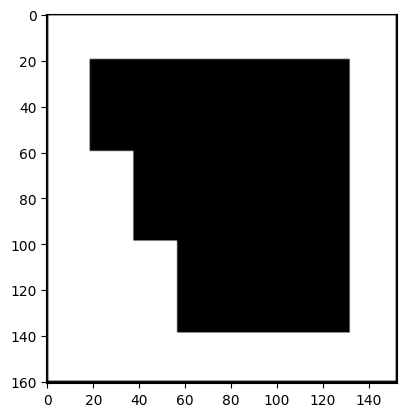

<PIL.Image.Image image mode=RGB size=32x32 at 0x7FB4183761D0>


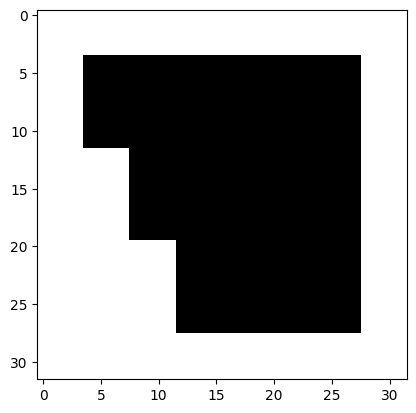

Processing on image images/8x8.png is complete
Result is saved at images/output1.png.



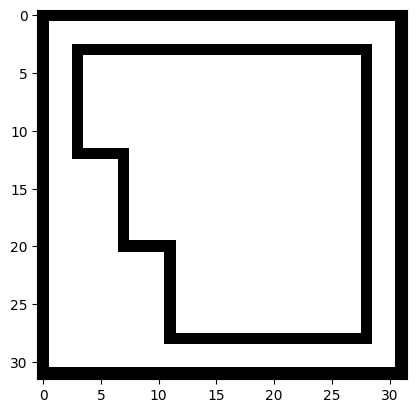

In [90]:

proc_name='optimalEdgeDetection'

inputLocation = 'images/8x8.png'
outputLocation = 'images/output1.png'

gray = img.open(inputLocation).convert('RGB')
print(gray.size)
plt.imshow(gray)
plt.show()

#Image resize
image_resize = gray.resize((32, 32), resample=0)
print(image_resize)
plt.imshow(image_resize)
plt.show()

out_img = Image_proc(image_resize, proc_name, outputLocation)

plt.imshow(out_img)
plt.show()